In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/My Drive/Research/FU_AI_LAB/Ear_recognize/"

/content/drive/My Drive/Research/FU_AI_LAB/Ear_recognize


In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import random

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

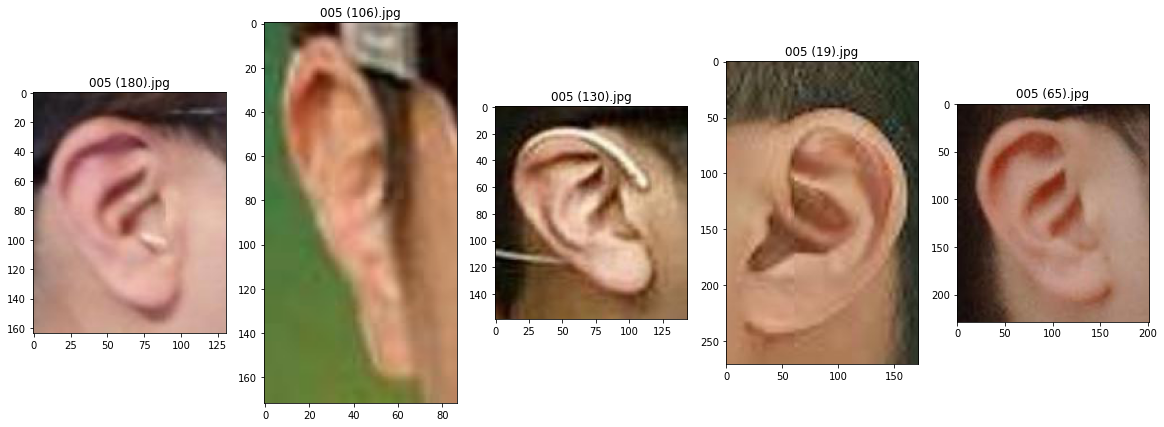

In [ ]:
plt.figure(figsize=(20,20))
test_folder="./Dataset/EarVN1.0dataset/Images/005.Bui_AT/"
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [ ]:
IMG_HEIGHT = 257
IMG_WIDTH = 161
BATCH_SIZE = 32
DATASET_PATH = "./Dataset/EarVN1.0dataset/Images/"

In [ ]:
images_ds = tf.data.Dataset.list_files(DATASET_PATH + "*/*", shuffle=200)

In [ ]:
len(images_ds)

28422

In [ ]:
train_size = int(len(images_ds)*0.8)
val_size = int(len(images_ds) * 0.1)
train_ds = images_ds.take(train_size)
val_ds = images_ds.skip(train_size).take(val_size)
test_ds = images_ds.skip(train_size).skip(val_size)

In [ ]:
type(val_ds)

tensorflow.python.data.ops.dataset_ops.TakeDataset

In [ ]:
%%capture
from tqdm import tqdm_notebook as tqdm
import time
tqdm().pandas()

In [41]:
import os
import shutil
#split folder
NEW_PATH = "./Dataset/EarVN1.0dataset/split_dataset/"
mode = 0o666

with tqdm(total=len(train_ds), desc ="train") as pbar:
    for image_path in train_ds:
        path = image_path.numpy().decode("utf-8")
        path_split = path.split("/")

        try:
            os.makedirs(os.path.join(NEW_PATH, "train", path_split[-2]))
        except FileExistsError:
            # directory already exists
            pass

        new_path = NEW_PATH + "train/" + path_split[-2] + "/" + path_split[-1]
        shutil.copyfile(path, new_path)
        pbar.update(1)
        # print(new_path)

print("train done")

with tqdm(total=len(val_ds), desc ="val") as pbar:
    for image_path in val_ds:
        path = image_path.numpy().decode("utf-8")
        path_split = path.split("/")

        try:
            os.makedirs(os.path.join(NEW_PATH, "val", path_split[-2]))
        except FileExistsError:
            # directory already exists
            pass

        new_path = NEW_PATH + "val/" + path_split[-2] + "/" + path_split[-1]
        shutil.copyfile(path, new_path)
        pbar.update(1)

print("val done")
 
with tqdm(total=len(test_ds), desc ="test") as pbar:
    for image_path in test_ds:
        path = image_path.numpy().decode("utf-8")
        path_split = path.split("/")

        try:
            os.makedirs(os.path.join(NEW_PATH, "test", path_split[-2]))
        except FileExistsError:
            # directory already exists
            pass

        new_path = NEW_PATH + "test/" + path_split[-2] + "/" + path_split[-1]
        shutil.copyfile(path, new_path)
        pbar.update(1)

print("test done")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


train:   0%|          | 0/22737 [00:00<?, ?it/s]

train done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


val:   0%|          | 0/2842 [00:00<?, ?it/s]

val done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


test:   0%|          | 0/2843 [00:00<?, ?it/s]

test done
